In [1]:
import requests 
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
base_url = "https://jsonplaceholder.typicode.com/albums/{}/photos"
url = base_url.format(str(1))
params = {}
r = requests.get(url = url, params = params)
data = r.json()
photos_data = pd.DataFrame.from_dict(data)
photos_data = photos_data.drop_duplicates(['albumId','id'])
photos_data['first_letter'] = photos_data.title.apply(lambda x: x[0])
letter_count = photos_data.groupby(['first_letter'])['id'].nunique().reset_index()

In [5]:
photos_data.shape

(5000, 6)

In [6]:
letter_count

,first_letter,id
0,a,499
1,b,45
2,c,243
3,d,349
4,e,795
5,f,101
6,h,36
7,i,343
8,l,99
9,m,205


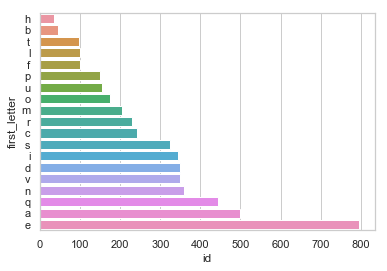

In [7]:
sns.barplot(x="id", y="first_letter", data=letter_count.sort_values(by='id'))